we set library and dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
df = pd.read_csv('C:\python\E-commerce.csv')
df

Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0      2018-01-02  10:56:33    8.0        37077  Female         Web   
1      2018-07-24  20:41:37    2.0        59173  Female         Web   
2      2018-11-08  08:38:49    8.0        41066  Female         Web   
3      2018-04-18  19:28:06    7.0        50741  Female         Web   
4      2018-08-13  21:18:39    9.0        53639  Female         Web   
...           ...       ...    ...          ...     ...         ...   
51285  2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51286  2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51287  2018-02-28  10:25:07    6.0        63313    Male         Web   
51288  2018-02-28  10:50:08    7.0        86485    Male         Web   
51289  2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  \
0                  Member  Auto & Accessories  Car Media Players  140.0   
1                  Member  Auto & Accessories       Car Speakers  211.0   
2                  Member  Auto & Accessories    Car Body Covers  117.0   
3                  Member  Auto & Accessories    Car & Bike Care  118.0   
4                  Member  Auto & Accessories               Tyre  250.0   
...                   ...                 ...                ...    ...   
51285              Member    Home & Furniture          Shoe Rack  124.0   
51286              Member    Home & Furniture          Umbrellas   70.0   
51287              Member    Home & Furniture    Dinner Crockery  133.0   
51288              Member    Home & Furniture        Sofa Covers  216.0   
51289              Member    Home & Furniture         Bed Sheets  211.0   

       Quantity  Discount  Profit  Shipping_Cost Order_Priority Payment_method  
0           1.0       0.3    46.0            4.6         Medium    credit_card  
1           1.0       0.3   112.0           11.2         Medium    credit_card  
2           5.0       0.1    31.2            3.1       Critical    credit_card  
3           1.0       0.3    26.2            2.6           High    credit_card  
4           1.0       0.3   160.0           16.0       Critical    credit_card  
...         ...       ...     ...            ...            ...            ...  
51285       4.0       0.3    19.2            1.9         Medium    money_order  
51286       5.0       0.2    14.0            1.4         Medium    credit_card  
51287       1.0       0.3    39.7            4.0         Medium    credit_card  
51288       1.0       0.2   131.7           13.2         Medium    credit_card  
51289       5.0       0.3    99.4            9.9         Medium    credit_card  

[51290 rows x 16 columns]

we check dataset types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

Data Cleaning & Formatting

In [25]:
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [26]:
df = df.dropna(how='all')
df.shape

(51290, 16)

Try to solve the question below

A. What devices do my customers use to reach me?

In [27]:
# count the number of each device type
device_counts = df['Device_Type'].value_counts()

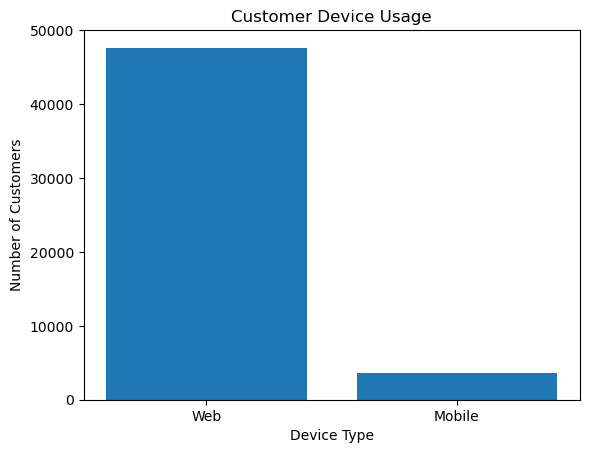

In [28]:
# create a bar chart of device usage
plt.bar(device_counts.index, device_counts.values)

# add a title and axis labels
plt.title('Customer Device Usage')
plt.xlabel('Device Type')
plt.ylabel('Number of Customers')

# display the chart
plt.show()

Based on this chart, we know that our product sell out from Web than Mobile, with significant gap between these device. 

B. Who is the customer base?

In [29]:
df['Customer_Login_type'].value_counts()

Member          49097
Guest            1993
First SignUp      173
New                27
Name: Customer_Login_type, dtype: int64

In [30]:
customer_counts = df['Customer_Login_type'].value_counts()
customer_counts_dict = customer_counts.to_dict()

In [31]:
# create a list of login types and a list of customer counts
login_types = list(customer_counts_dict.keys())
customer_counts_list = list(customer_counts_dict.values())

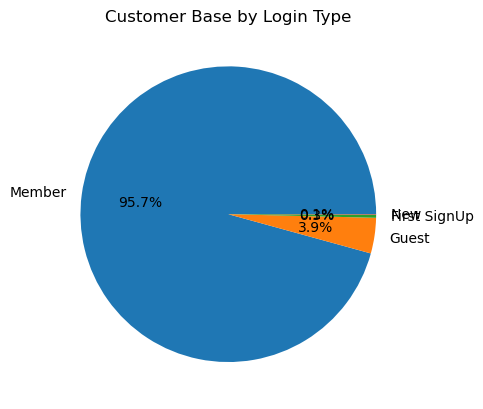

In [32]:
# create a pie chart of the customer counts by login type

fig, ax = plt.subplots()
ax.pie(customer_counts_list,labels=login_types, autopct = '%1.1f%%')
ax.set_title('Customer Base by Login Type')
plt.show()

Based on this chart, we know that our sales coming from our member than other, we should encourage 4.3% others become our member to optimize our selling.

C. What product categories am I selling?

In [33]:
# count the number of each category
category_counts = df['Product_Category'].value_counts()

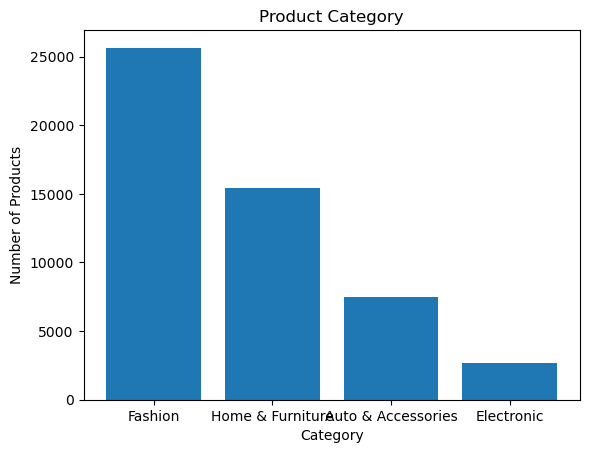

In [34]:
# create a bar chart of category
plt.bar(category_counts.index, category_counts.values)

# add a title and axis labels
plt.title('Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')

# display the chart
plt.show()

Based on this chart, we know that our main category coming from fashion but we can optimize which fashion that being our top sales, following home & furniture category

D. Which product categories do I sell to whom? (Gender Distribution by Category or Product?)

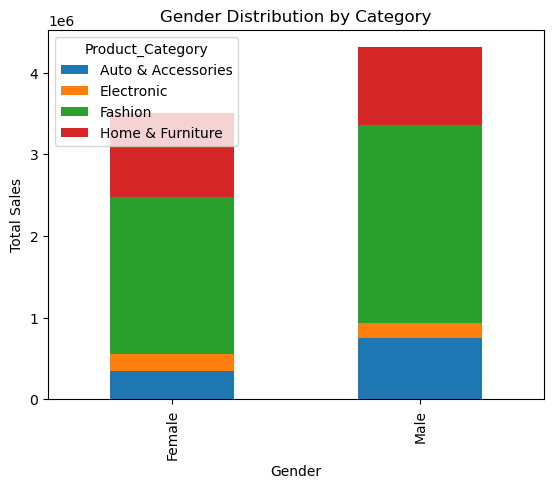

In [35]:
# create a pivot table to get the total sales by gender and category
gender_category_sales = df.pivot_table(index='Gender', columns='Product_Category',values='Sales',aggfunc='sum')

# create a stacked bar chart
gender_category_sales.plot(kind='bar',stacked=True)
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Gender Distribution by Category')
plt.show()

Based on distribution chart, i personally surprised because we dominating on fashion but we have male customer more than female, this is good because we know we could do better to encourage our fashion category to grab more female customer.

E. How does the date and time affect my sales? (Total sales by month, the days of week or time arrival)

1. Total sales by month

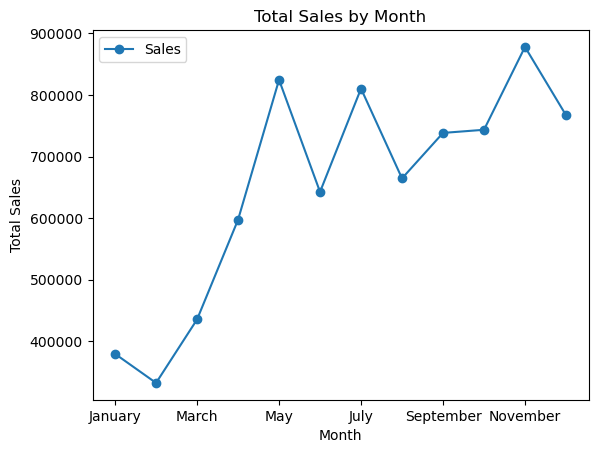

In [36]:
# convert the order_date column to a datetime format
df['Date'] = pd.to_datetime(df['Order_Date'])

# convert a new column for the month and specify the order
month_order = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Date'].dt.month_name(), categories=month_order, ordered=True)

# sort the data fram by the month column
df = df.sort_values('Month')

# create a pivot table to get the total sales by month
monthly_sales = df.pivot_table(index='Month', values='Sales', aggfunc='sum')

#create a line chart of the monthly sales
monthly_sales.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()

Based on this chart, on first quarter our sales still low from average, but in the middle of second quarter our sales growth and on November we reach our biggest sales of the year before we going down on December.

2. Total Sales by Day of Week

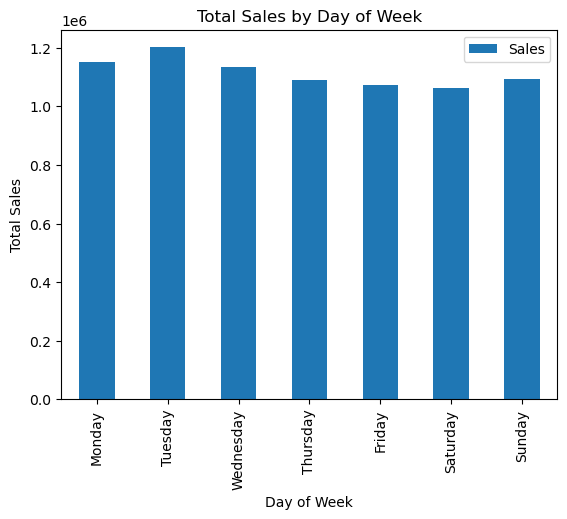

In [37]:
# convert the order_date column to a datetime format
df['Date'] = pd.to_datetime(df['Order_Date'])

# convert a new column for the day of week and specify the order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Day_of_Week'] = pd.Categorical(df['Date'].dt.day_name(), categories=day_order, ordered=True)

# sort the data fram by the day of week column
df = df.sort_values('Day_of_Week')

# create a pivot table to get the total sales by day
daily_sales = df.pivot_table(index='Day_of_Week', values='Sales', aggfunc='sum')

#create a line chart of the monthly sales
daily_sales.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of Week')
plt.show()

we reach on average 1M total sales on average per week but surprisingly, we have a biggest sales on tuesday which is a weekdays not on weekend

3. Total Sales by Time of Day

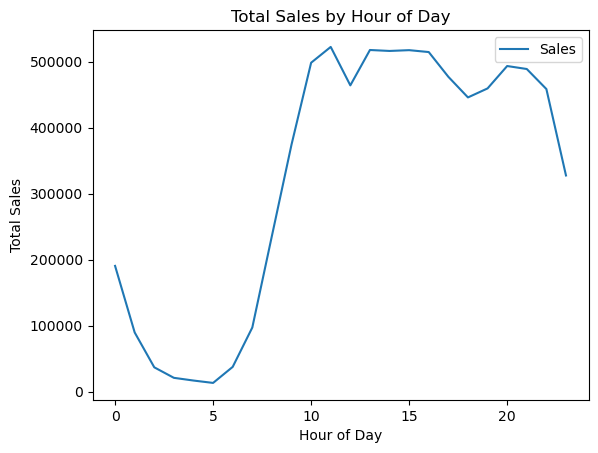

In [38]:
# convert the time column to a datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# convert a new column for the hour of the day
df['Hour'] = df['Time'].dt.hour

# create a pivot table to get the total sales by hour of the day
Hourly_sales = df.pivot_table(index='Hour', values='Sales', aggfunc='sum')

#create a line chart of the hourly sales
Hourly_sales.plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of Day')
plt.show()

based on this chart, our sales reach maximum average starts on 10AM and going down after 8PM.

F. From which product do I earn the most profit per unit?

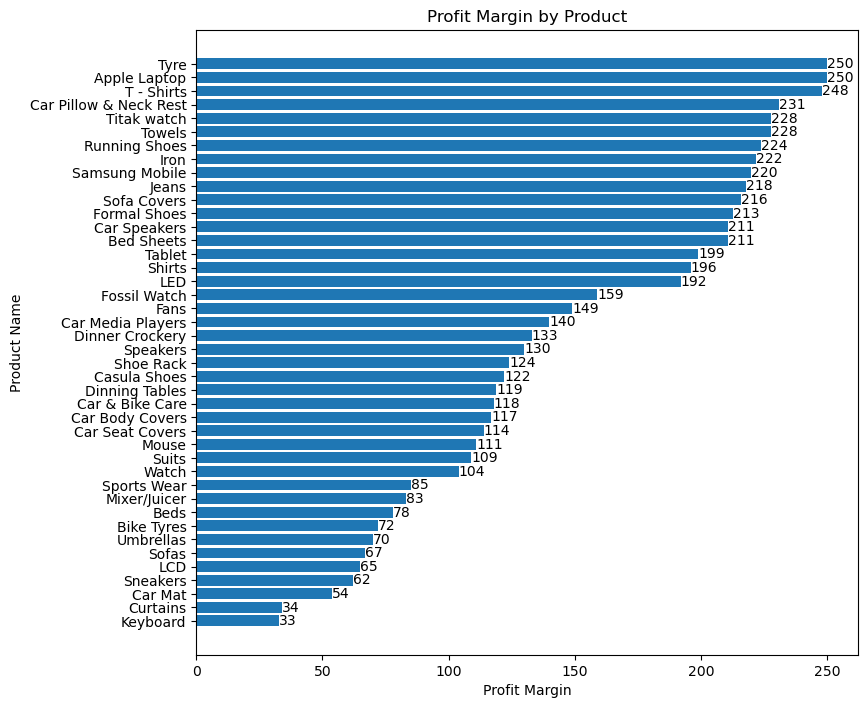

In [39]:
# Calculate profit margin by product
df['profit_margin'] = (df['Sales'] - df['Shipping_Cost'] / df['Sales'])
profit_margin_by_product = df.groupby('Product')['profit_margin'].mean().reset_index()

# Sort by Profit margin in descending
profit_margin_by_product = profit_margin_by_product.sort_values('profit_margin', ascending=True)

# Plot horizontal bar chart
fig, ax = plt.subplots()
ax.barh(y = profit_margin_by_product['Product'], width = profit_margin_by_product['profit_margin'])
plt.xlabel('Profit Margin')
plt.ylabel('Product Name')
plt.title('Profit Margin by Product')
plt.tight_layout(pad=-7.5)

# add data lables to the bar chart
for i, v in enumerate(profit_margin_by_product['profit_margin']):
    ax.text(v,i,"{:.0f}".format(v),color='black', ha='left', va='center', fontweight='light')
plt.show()

For product that we have, we have top 3 on biggest profit margin on 3 categories, Tyre from Auto & Accessories, Apple Laptop from Electronics and T - Shirt from Fashion, from here we should develop our Home & Furniture product and keep maintaining our dominating categories to encourage our profit on each categories.